In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [18]:
plt.rcParams['figure.figsize'] = 17,7
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
np.set_printoptions(legacy='1.25')

# Amphiscan 44 Peptide data import

In [19]:
os.chdir('/home/cadeniran/u1/amphiscan-pep')
df = pd.DataFrame(columns=['ID', 'Results.1', 'Results.2', 'Results.3'])

subdir=[]
dir='/home/cadeniran/u1/amphiscan-pep/results.1'
dirlist = [ item for item in os.listdir(dir) if os.path.isdir(os.path.join(dir, item)) ]
for dir in dirlist:
    subdir.append(dir)
subdir.sort()
df['ID'] = subdir

In [20]:
for i in range(1,4):
    rmsd=[]
    for p in subdir:
        with open('results_grid.{}/1.0_50/results/{}/txt/rmsd.txt'.format(i,p), 'r') as f:
            lines = f.read().splitlines()
            last_line = lines[-1]
            lastCol = last_line.split(sep=' ')[3]
            rmsd.append(lastCol)
    df['Results.{}'.format(i)] = rmsd
df['Results.1'] = pd.to_numeric(df['Results.1'])
df['Results.2'] = pd.to_numeric(df['Results.2'])
df['Results.3'] = pd.to_numeric(df['Results.3'])
df['Lowest'] = df[['Results.1','Results.2','Results.3']].min(axis=1)

In [21]:
# Calculate the average
df['Results.1'].mean(axis=0)

5.0943038903338556

In [22]:
df['Results.2'].mean(axis=0)

4.688006035497633

In [23]:
df['Results.3'].mean(axis=0)

5.428800880278951

In [24]:
df['Lowest'].mean(axis=0)

3.5940202197076685

(0.0, 17.0)

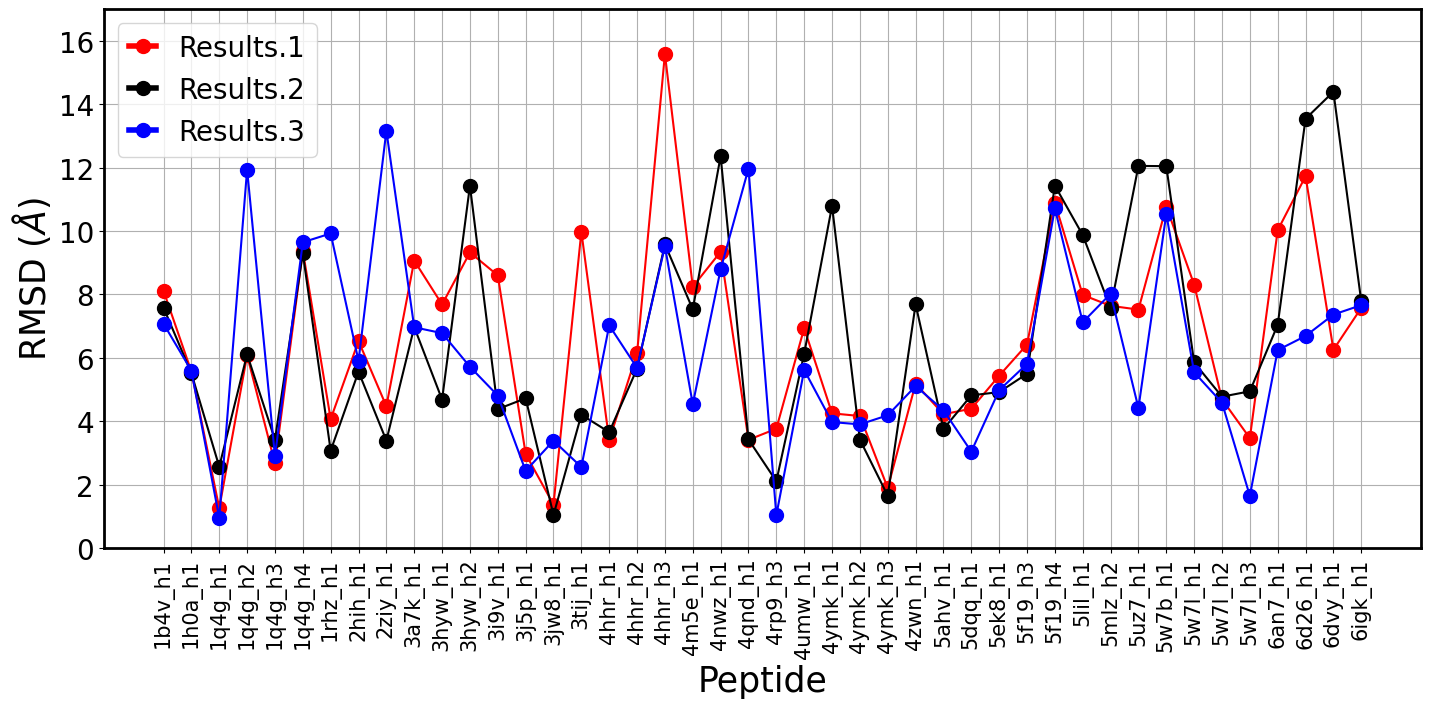

In [8]:
# Plot the RMSDs
X=df["ID"]
Y1=df["Results.1"]
Y2=df["Results.2"]
Y3=df["Results.3"]

# Plot
plt.plot(X, Y1, marker="o", markersize=10, c='red', label="Results.1")
plt.plot(X, Y2, marker="o", markersize=10, c='black', label="Results.2")
plt.plot(X, Y3, marker="o", markersize=10, c='blue', label="Results.3")

leg = plt.legend(fontsize=20,handlelength=1,loc="best")

# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)

plt.grid(True)
plt.xlabel("Peptide", fontsize=25)
plt.ylabel("RMSD ($\AA$)", fontsize=25)
plt.tick_params(axis='x', rotation=90, labelsize=15)
plt.tick_params(axis='y', labelsize=20)
plt.ylim(0,17)

# Save figure
plt.savefig("/home/cadeniran/ipn/figs/newrmsd44.png", format='png',bbox_inches='tight')

### Plotting absolute lowest RMSD values

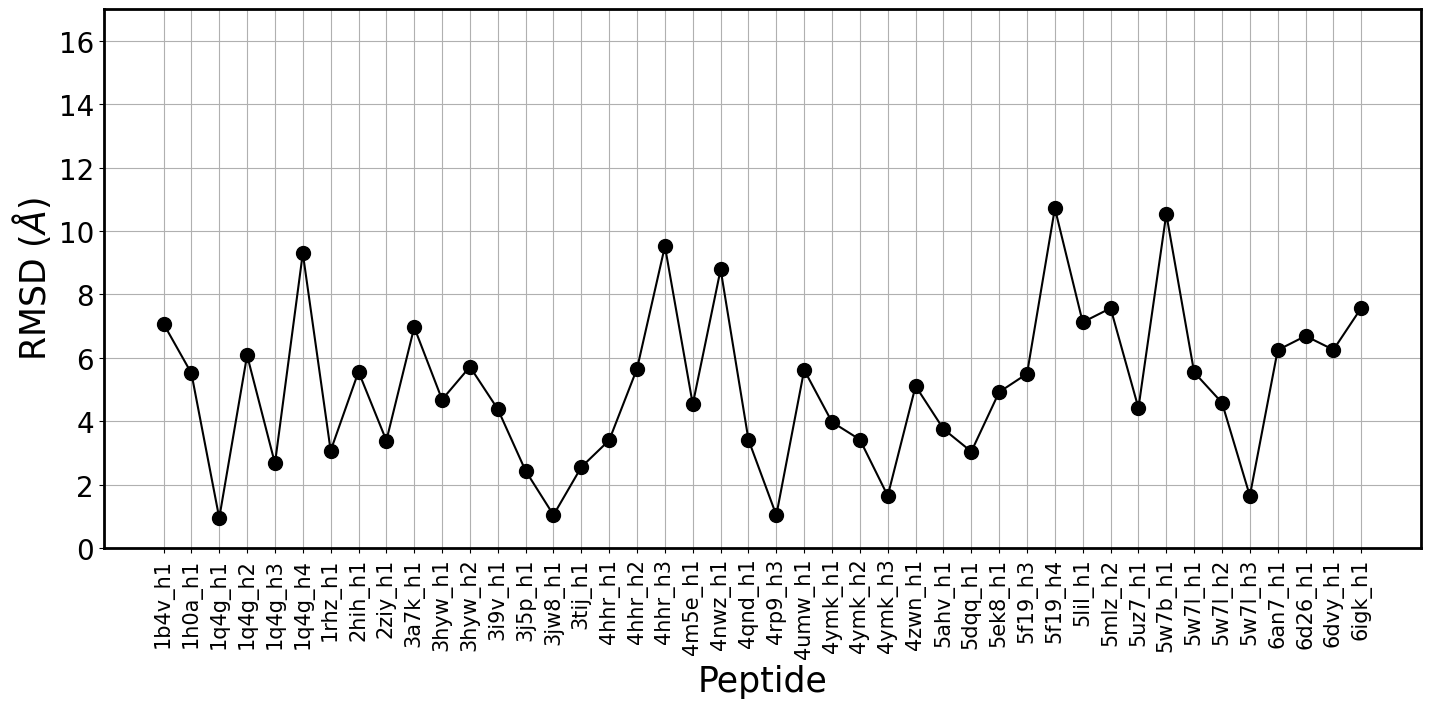

In [18]:
# Plot the RMSDs
X=df["ID"]
Y=df["Lowest"]

# Plot
plt.plot(X, Y, marker="o", markersize=10, c='black', label="Lowest")


plt.grid(True)
plt.xlabel("Peptide", fontsize=25)
plt.ylabel("RMSD ($\AA$)", fontsize=25)
plt.tick_params(axis='x', rotation=90, labelsize=15)
plt.tick_params(axis='y', labelsize=20)
plt.ylim(0,17)

# Save figure
plt.savefig("/home/cadeniran/ipn/figs/rmsdlowest.png", format='png',bbox_inches='tight')